## **PROJET INFORMATIQUE MAGEFI 2**

Laithier Clément, Antoine Gouzy

In [46]:
# On installe et importe les packages nécessaires.
!pip install --quiet ipython-sql
!pip install squarify
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import lines
from matplotlib import patches
import matplotlib.cm as cm 
from matplotlib.patheffects import withStroke
from scipy.interpolate import make_interp_spline
from PIL import Image 

In [47]:
# On charge la base de donnée et on observe rapidement ses tables.
%load_ext sql
%sql sqlite:///global.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [48]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///global.db
Done.


name
indicators
countries
Export_by_Region_Year


In [49]:
%%sql
SELECT * FROM Countries; 

 * sqlite:///global.db
Done.


index,Country,Region,Population,Area_(sq._mi.),Pop._Density_(per_sq._mi.),Coastline_(coast/area_ratio),Net_migration,Infant_mortality_(per_1000_births),GDP_($_per_capita),Literacy_(%),Phones_(per_1000),Arable_(%),Crops_(%),Other_(%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",None,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [50]:
%%sql
SELECT * FROM Indicators WHERE country ="France"; 

 * sqlite:///global.db
Done.


index,CountryID,Country,Year,AMA_exchange_rate,IMF_based_exchange_rate,Population,Currency,Per_capita_GNI,"Agriculture,_hunting,_forestry,_fishing_(ISIC_A-B)",Changes_in_inventories,Construction_(ISIC_F),Exports_of_goods_and_services,Final_consumption_expenditure,General_government_final_consumption_expenditure,Gross_capital_formation,Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables),Household_consumption_expenditure_(including_Non-profit_institutions_serving_households),Imports_of_goods_and_services,Manufacturing_(ISIC_D),"Mining,_Manufacturing,_Utilities_(ISIC_C-E)",Other_Activities_(ISIC_J-P),Total_Value_Added,"Transport,_storage_and_communication_(ISIC_I)","Wholesale,_retail_trade,_restaurants_and_hotels_(ISIC_G-H)",Gross_National_Income(GNI)_in_USD,Gross_Domestic_Product_(GDP)
3089,250,France,1970,0.846730808,0.846730808,51724116,Euro,2882,9888620945.0,3736724790.0,10435429914.0,23724186975.0,106000000000.0,25233521450.0,41851553854.0,38114829064.0,80559251389.0,22917555169.0,29377695689.0,32371563370.0,49666316160.0,132000000000.0,10499204610.0,18672994835.0,149000000000.0,148000000000.0
3090,250,France,1971,0.844659231,0.844659231,52185222,Euro,3196,10121241421.0,2488577549.0,12114944843.0,27355410490.0,119000000000.0,28813986865.0,45460936874.0,42972359325.0,90115631449.0,25771339719.0,33241808004.0,36496374932.0,56249903194.0,147000000000.0,11675714457.0,20645012037.0,167000000000.0,166000000000.0
3091,250,France,1972,0.769035854,0.769035854,52637888,Euro,3881,13858911710.0,3347048109.0,14862766077.0,33825471037.0,146000000000.0,35413173345.0,56269158044.0,52922109935.0,110000000000.0,32246871036.0,39401283893.0,43459612233.0,69254248336.0,180000000000.0,14059162452.0,24902610073.0,204000000000.0,203000000000.0
3092,250,France,1973,0.678821885,0.678821885,53053660,Euro,4999,18006196125.0,5207551608.0,19080115537.0,46339107036.0,188000000000.0,46539454142.0,74633716294.0,69426164687.0,142000000000.0,44637629778.0,52219883844.0,57465737105.0,90985575657.0,236000000000.0,18543892401.0,32105623688.0,265000000000.0,264000000000.0
3093,250,France,1974,0.733221609,0.733221609,53415250,Euro,5356,15547823267.0,6467348942.0,18968344386.0,58908520210.0,206000000000.0,51475569613.0,83141303001.0,76673954059.0,154000000000.0,62035814837.0,56993683029.0,62468153432.0,102000000000.0,255000000000.0,20277634767.0,35862281826.0,286000000000.0,286000000000.0
3094,250,France,1975,0.653670822,0.653670822,53715733,Euro,6735,17476686448.0,-1935224821.0,25263480392.0,67959282393.0,268000000000.0,70644119991.0,89828087782.0,91763312603.0,197000000000.0,64442221631.0,69784360031.0,77187168654.0,133000000000.0,323000000000.0,25701009482.0,44701398634.0,362000000000.0,361000000000.0
3095,250,France,1976,0.732194086,0.732194086,53966558,Euro,6919,17091096791.0,5448009038.0,24539941437.0,71989109145.0,277000000000.0,74009065366.0,98513497092.0,93065488055.0,203000000000.0,75449940156.0,71547969281.0,79238553109.0,139000000000.0,332000000000.0,27007866313.0,44997631929.0,373000000000.0,372000000000.0
3096,250,France,1977,0.747788852,0.747788852,54221988,Euro,7584,17829899386.0,6081930729.0,26587719162.0,83015412440.0,306000000000.0,82723886297.0,105000000000.0,98886202653.0,223000000000.0,83708121349.0,78599727465.0,87514008520.0,156000000000.0,369000000000.0,30138186639.0,51395524120.0,411000000000.0,410000000000.0
3097,250,France,1978,0.68801766,0.68801766,54486195,Euro,9329,21131725032.0,3321135683.0,32715730020.0,103000000000.0,378000000000.0,104000000000.0,123000000000.0,120000000000.0,274000000000.0,97263491812.0,97980043187.0,109000000000.0,191000000000.0,452000000000.0,36674930720.0,61717892569.0,508000000000.0,507000000000.0
3098,250,France,1979,0.64858164,0.64858164,54753575,Euro,11263,25378455068.0,7801639286.0,39173171805.0,127000000000.0,459000000000.0,126000000000.0,153000000000.0,145000000000.0,333000000000.0,125000000000.0,116000000000.0,130000000000.0,231000000000.0,545000000000.0,45274177072.0,7373

# **Économie**

## **Graphique 1 : Volatilité des taux de change entre 1970 et 2021**

*L'objectif du graphique ci-dessous est de rendre compte de la volatilités des taux de change des différents pays du monde. 
La treemap c'est révéler être le format le plus adapté car on peut parcourir toutes les valeurs, sans que les plus
faibles soient écrasées par les plus importantes.*

In [51]:
%%sql
SELECT Indicators.CountryID, Indicators.Country, Indicators.AMA_exchange_rate, countries.Region
FROM Indicators
INNER JOIN countries 
ON Indicators.Country = countries.Country
WHERE Indicators.Country <> 'United States' ;

 * sqlite:///global.db
Done.


CountryID,Country,AMA_exchange_rate,Region
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.044998427,ASIA (EX. NEAR EAST)
4,Afghanistan,0.043730753,ASIA (EX. NEAR EAST)


In [52]:
df_gr1_treemap = %sql SELECT Indicators.CountryID, Indicators.Country, Indicators.AMA_exchange_rate, countries.Region FROM Indicators INNER JOIN countries ON Indicators.Country = countries.Country WHERE Indicators.Country <> 'United States' ;
df_gr1_treemap = df_gr1_treemap.DataFrame()  
df_gr1_treemap.head()

 * sqlite:///global.db
Done.


,CountryID,Country,AMA_exchange_rate,Region
0,4,Afghanistan,0.044998,ASIA (EX. NEAR EAST)
1,4,Afghanistan,0.044998,ASIA (EX. NEAR EAST)
2,4,Afghanistan,0.044998,ASIA (EX. NEAR EAST)
3,4,Afghanistan,0.044998,ASIA (EX. NEAR EAST)
4,4,Afghanistan,0.044998,ASIA (EX. NEAR EAST)


In [53]:
df_gr1_treemap.isna().sum()# On constate qu'il n'y a aucune valeurs manquantes.

CountryID            0
Country              0
AMA_exchange_rate    0
Region               0
dtype: int64

In [54]:
# On fait un tableau croisé dynamique, sur le taux de change avec comme fonction l'écart-type.
df_gr1_treemap = df_gr1_treemap.pivot_table(values='AMA_exchange_rate', index=['Country','Region'], aggfunc='std').reset_index() # On fait un tableau croisé dynamique en aggrégeant par volatilité.
df_gr1_treemap = df_gr1_treemap.rename(columns={'AMA_exchange_rate' : 'AMA_exch_rate_vol'}) # On renome la colonne pour plus de clarté.
df_gr1_treemap.head()

,Country,Region,AMA_exch_rate_vol
0,Afghanistan,ASIA (EX. NEAR EAST),29.150420
1,Albania,EASTERN EUROPE,54.621522
2,Algeria,NORTHERN AFRICA,41.278938
3,Andorra,WESTERN EUROPE,0.204907
4,Angola,SUB-SAHARAN AFRICA,130.627792


In [55]:
df_gr1_treemap['all'] = 'World' # On ajoute une colonne pour la présentation.
df_gr1_treemap = df_gr1_treemap[df_gr1_treemap["AMA_exch_rate_vol"]!=0] #On retire les valeurs = 0 (volatilité nulle).
df_gr1_treemap.head()

,Country,Region,AMA_exch_rate_vol,all
0,Afghanistan,ASIA (EX. NEAR EAST),29.150420,World
1,Albania,EASTERN EUROPE,54.621522,World
2,Algeria,NORTHERN AFRICA,41.278938,World
3,Andorra,WESTERN EUROPE,0.204907,World
4,Angola,SUB-SAHARAN AFRICA,130.627792,World


In [56]:
fig = px.treemap(df_gr1_treemap, 
                 path=['all','Region','Country'], 
                 values='AMA_exch_rate_vol',
                 color='AMA_exch_rate_vol', 
                 hover_data=['Country'],
                 color_continuous_scale='amp',
                title = 'Volatilité des taux de change entre 1970 et 2021')

fig.update_layout(coloraxis_colorbar=dict(thicknessmode='pixels', thickness=25), 
                  coloraxis_colorbar_xanchor='left',
                  title_font_family = "Open Sans",
                  title_xanchor="auto",
                  margin=dict(t=50, l=25, r=25, b=25))
fig.show()## **Graphique 2 : Les exportations à travers le monde**

## **Graphique 2 : Les exportations à travers le monde**

*On s'intéresse maintenant à la variation des exportations par régions.*

In [57]:
%%sql
CREATE TABLE Export_by_Region_Year AS
SELECT countries.Region, indicators.Year, SUM(indicators.Exports_of_Goods_and_Services) AS Total_Export
FROM indicators
INNER JOIN countries ON indicators.Country = countries.Country
GROUP BY countries.Region, indicators.Year;

 * sqlite:///global.db
(sqlite3.OperationalError) table Export_by_Region_Year already exists
[SQL: CREATE TABLE Export_by_Region_Year AS
SELECT countries.Region, indicators.Year, SUM(indicators.Exports_of_Goods_and_Services) AS Total_Export
FROM indicators
INNER JOIN countries ON indicators.Country = countries.Country
GROUP BY countries.Region, indicators.Year;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [58]:
%%sql 
SELECT *
FROM Export_by_Region_Year;

 * sqlite:///global.db
Done.


Region,Year,Total_Export
ASIA (EX. NEAR EAST),1970,36851457841.0
ASIA (EX. NEAR EAST),1971,43012830482.0
ASIA (EX. NEAR EAST),1972,50972272568.0
ASIA (EX. NEAR EAST),1973,70400057455.0
ASIA (EX. NEAR EAST),1974,104816703602.0
ASIA (EX. NEAR EAST),1975,107049407400.0
ASIA (EX. NEAR EAST),1976,125154220699.0
ASIA (EX. NEAR EAST),1977,147648581635.0
ASIA (EX. NEAR EAST),1978,174624469455.0
ASIA (EX. NEAR EAST),1979,205995717077.0


In [59]:
# On convertie la table SQL en dataframe 
df = %sql SELECT * FROM Export_by_Region_Year;
df = df.DataFrame()
df = df[df['Year'] >= 1990]

 * sqlite:///global.db
Done.


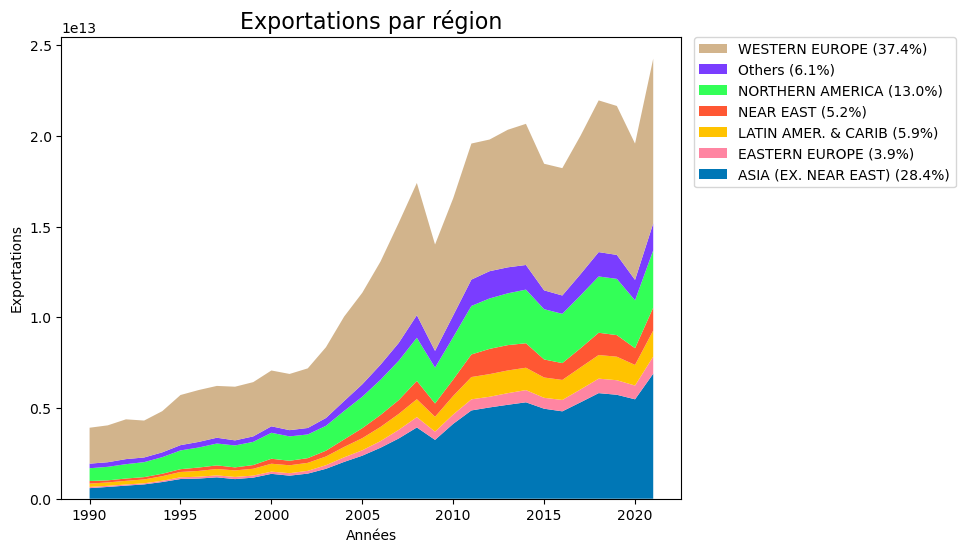

In [60]:
# On identifie les 5 régions avec le moins de population et on les remplacent par 'others'
regions_to_group = df.groupby('Region')['Total_Export'].sum().nsmallest(5).index
df.loc[df['Region'].isin(regions_to_group), 'Region'] = 'Others'

pivot_df = df.pivot_table(index='Year', columns='Region', values='Total_Export', aggfunc='sum')
custom_palette = ['#0077B6', '#FF85A2', '#FFC300', '#FF5733', '#33FF57', '#7A3DFF', '#D2B48C']
plt.figure(figsize=(8, 6))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, colors=custom_palette)
plt.xlabel('Années')
plt.ylabel('Exportations')
plt.title('Exportations par région', fontsize=16)
final_values = pivot_df.iloc[-1]

# On calcul la part de chaque région dans les exportations totales
total_exports = pivot_df.sum(axis=1).iloc[-1]
region_percentages = final_values / total_exports * 100
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = [f"{label} ({region_percentages[label]:.1f}%)" for label in reversed(labels)]
plt.legend(reversed(handles), legend_labels, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.show()

## **Graphique 3 et 4 : Les exportations plus en détails**

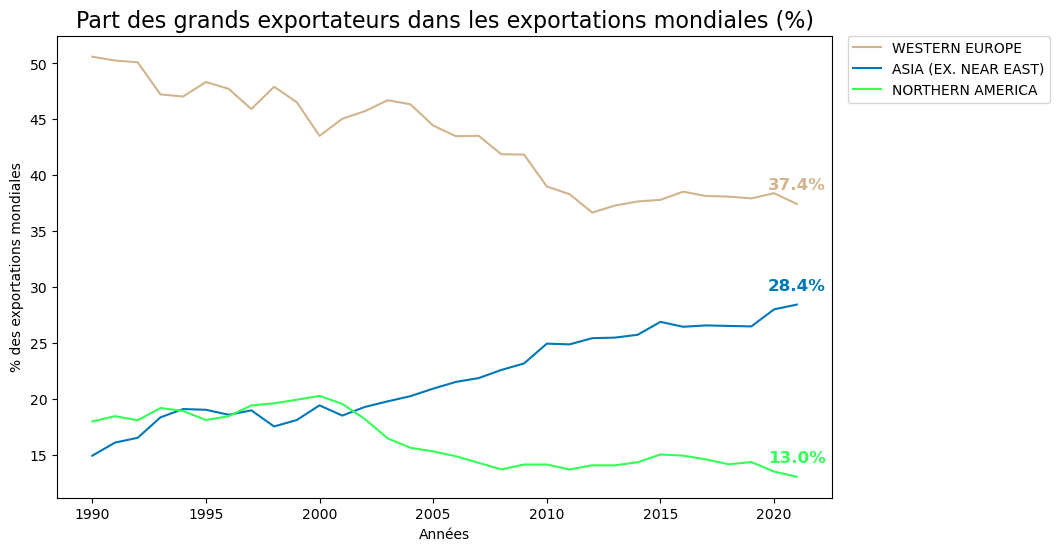

In [61]:
region_percentages_over_time = pivot_df.div(pivot_df.sum(axis=1),axis=0)*100
# On filtre les régions à garder.
regions_to_keep = ['ASIA (EX. NEAR EAST)', 'WESTERN EUROPE', 'NORTHERN AMERICA']
filtered_region_percentages_over_time = region_percentages_over_time[regions_to_keep]

region_colors = {
    'ASIA (EX. NEAR EAST)': '#0077B6',  # Bleu
    'WESTERN EUROPE': '#D2B48C',  # Marron clair
    'NORTHERN AMERICA': '#33FF57'  # Vert
}

# On trie les noms de colonnes en fonction des pourcentages des exportations mondiales.
sorted_columns = filtered_region_percentages_over_time.columns.tolist()
sorted_columns.sort(key=lambda region: filtered_region_percentages_over_time[region].iloc[-1], reverse=True)

# On crée un graphique pour chaque région montrant son évolution au fil du temps.
plt.figure(figsize=(10, 6))
for region in sorted_columns:
    plt.plot(filtered_region_percentages_over_time.index, filtered_region_percentages_over_time[region], label=region, color=region_colors.get(region))

    plt.xlabel('Années')
plt.ylabel('% des exportations mondiales')
plt.title('Part des grands exportateurs dans les exportations mondiales (%)', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
for region in sorted_columns:
    final_value = filtered_region_percentages_over_time[region].iloc[-1]  # Récupérer la dernière valeur
    year = filtered_region_percentages_over_time.index[-1]  # Récupérer l'année correspondante
    plt.text(year, final_value + 1, f'{final_value:.1f}%', fontsize=12, fontweight='bold', color=region_colors.get(region), ha='center', va='bottom')

plt.show()

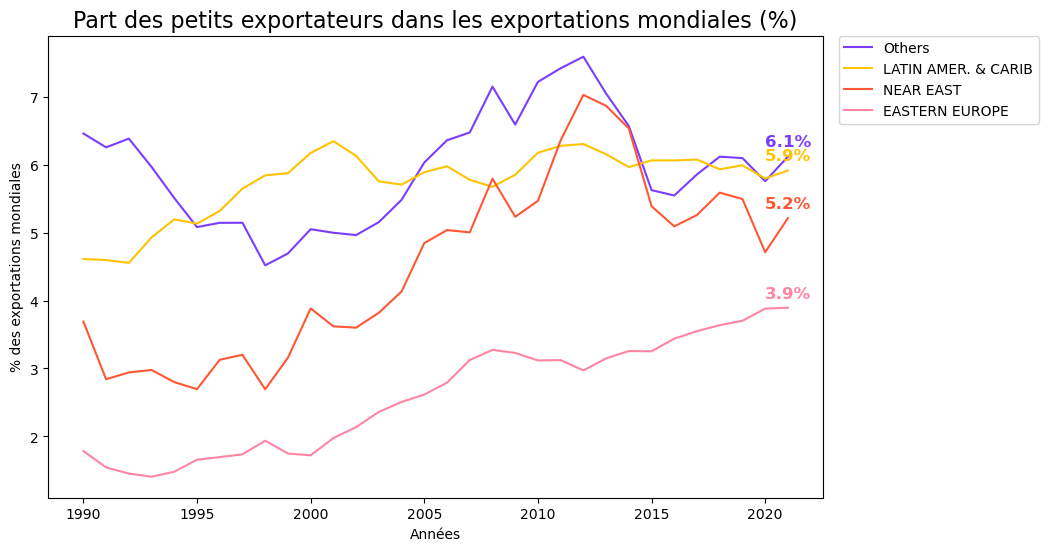

In [62]:
# Filtrer les régions à garder
regions_to_keep = ['Others', 'NEAR EAST', 'LATIN AMER. & CARIB', 'EASTERN EUROPE']
filtered_region_percentages_over_time = region_percentages_over_time[regions_to_keep]

# Définir les couleurs pour chaque région
region_colors = {
    'Others': '#7A3DFF',  # Violet
    'NEAR EAST': '#FF5733',  # Rouge
    'LATIN AMER. & CARIB': '#FFC300',  # Jaune
    'EASTERN EUROPE': '#FF85A2'  # Rose
}

# Trier les noms de colonnes en fonction des pourcentages des exportations mondiales
sorted_columns = filtered_region_percentages_over_time.columns.tolist()
sorted_columns.sort(key=lambda region: filtered_region_percentages_over_time[region].iloc[-1], reverse=True)

# Créer un graphique pour chaque région montrant son évolution au fil du temps
plt.figure(figsize=(10, 6))
for region in sorted_columns:
    plt.plot(filtered_region_percentages_over_time.index, filtered_region_percentages_over_time[region], label=region, color=region_colors.get(region))

# Ajouter des étiquettes pour les axes et le titre
plt.xlabel('Années')
plt.ylabel('% des exportations mondiales')
plt.title('Part des petits exportateurs dans les exportations mondiales (%)', fontsize=16)

# Afficher la légende à l'extérieur du graphique avec l'ordre trié
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Ajouter la dernière donnée en gras de la couleur du graphique un peu plus haut du graphique
for region in sorted_columns:
    final_value = filtered_region_percentages_over_time[region].iloc[-1]  # Récupérer la dernière valeur
    year = filtered_region_percentages_over_time.index[-1]  # Récupérer l'année correspondante
    plt.text(year, final_value + 0.1, f'{final_value:.1f}%', fontsize=12, fontweight='bold', color=region_colors.get(region), ha='center', va='bottom')

# Afficher le graphique
plt.show()## **Graphique 5 : Variation du PIB**

## **Graphique 5 : Variation du PIB**

*On s'intéressera ici à la variation du PIB des principaux pays producteurs à travers le temps.*

In [63]:
%%sql
SELECT indicators.Country, indicators.Year, indicators.'Gross_Domestic_Product_(GDP)'
FROM indicators
WHERE Country IN ('France','United States','Germany','United Kingdom','Japan','China','India','Italy','Australia');

 * sqlite:///global.db
Done.


Country,Year,Gross_Domestic_Product_(GDP)
Australia,1970,45216647240.0
Australia,1971,50469583098.0
Australia,1972,59402802259.0
Australia,1973,85802769997.0
Australia,1974,102000000000.0
Australia,1975,109000000000.0
Australia,1976,118000000000.0
Australia,1977,116000000000.0
Australia,1978,136000000000.0
Australia,1979,150000000000.0


In [64]:
# On convertie la table SQL en dataframe 
df = %sql SELECT indicators.Country, indicators.Year, indicators.'Gross_Domestic_Product_(GDP)' FROM indicators WHERE Country IN ('France','United States','Germany','United Kingdom','Japan','China','India','Italy','Australia');
df = df.DataFrame()

 * sqlite:///global.db
Done.


In [65]:
# On supprime les valeurs manquantes
df = df.dropna()

In [66]:
# On divise le GDP afin d'avoir des milliards
df['Gross_Domestic_Product_(GDP)'] = df['Gross_Domestic_Product_(GDP)'] / 1000000000
print(df.head())

     Country  Year  Gross_Domestic_Product_(GDP)
0  Australia  1970                     45.216647
1  Australia  1971                     50.469583
2  Australia  1972                     59.402802
3  Australia  1973                     85.802770
4  Australia  1974                    102.000000


C:\Users\antoi\AppData\Local\Temp\ipykernel_203512\1015166498.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



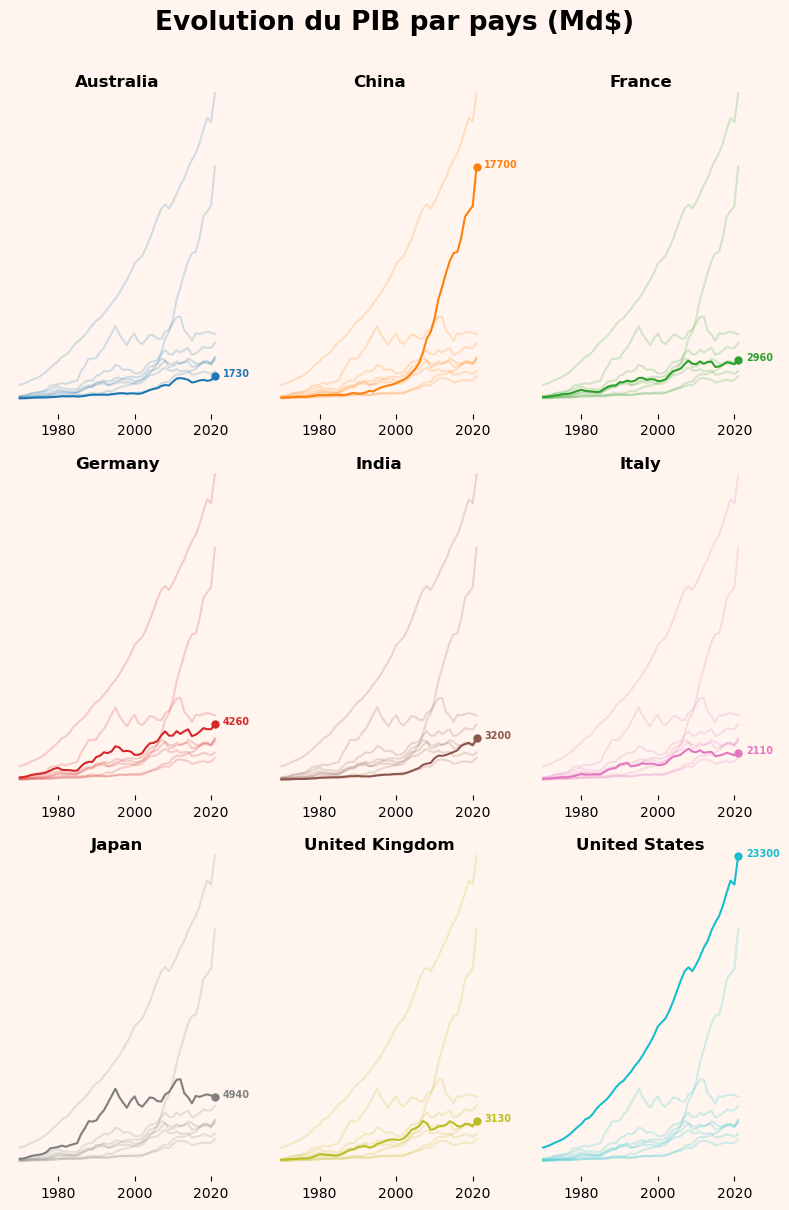

In [67]:
# Création d'une colormap pour chaque pays
num_countries = len(df['Country'].unique())
colors = plt.cm.get_cmap('tab10', num_countries)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 12))

for i, (group, ax) in enumerate(zip(df['Country'].unique(), ax.flatten())):

    filtered_df = df[df['Country'] == group]
    x = filtered_df['Year']
    y = filtered_df['Gross_Domestic_Product_(GDP)']
    
    sorted_df = filtered_df.sort_values(by='Year')
    last_value = sorted_df.iloc[-1]['Gross_Domestic_Product_(GDP)']
    last_date = sorted_df.iloc[-1]['Year']

    ax.set_facecolor('seashell')
    fig.set_facecolor('seashell')
    
    ax.plot(x, y, color=colors(i))
    
    ax.plot(last_date, 
            last_value, 
            marker='o',
            markersize=5, 
            color=colors(i), 
           )
    
    ax.text(last_date*1.001,
             last_value, 
             f'{round(last_value)}', # On arrondis les valeurs
             fontsize=7,
             color=colors(i),
             fontweight='bold',
           )
    
    # On éclaricie les autres groupes
    other_groups = df['Country'].unique()[df['Country'].unique() != group]
    for other_group in other_groups:

        other_y = df['Gross_Domestic_Product_(GDP)'][df['Country'] == other_group]
        other_x = df['Year'][df['Country'] == other_group]

        ax.plot(other_x, other_y, color=colors(i), alpha=0.2)

    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    
    ax.set_title(f'{group}', fontsize=12, fontweight='bold', y=0.95)
    
    ax.set_yticks([])
    
    plt.suptitle('Evolution du PIB par pays (Md$)', fontsize=19, fontweight='bold', y=1.005)

plt.tight_layout()
plt.show()

# **DEVELOPPEMENT ET DEMOGRAPHIE**

# **Graphique 6 : Taux d'alphabétisation mondiale**

*L'objectif de ce graphique est de rendre compte du taux d'alphabétisation à travers le monde. Nous avons choisis une carte chloroplète pour que cela soit le plus visuel possible. Afin réaliser cette carte, nous avons utiliser une table intermédiaire pour convertir le nom de nos pays en code ISO alpha. On aurait pue l'ajouter directement dans la base de données comme une troisième table, mais pour ne pas altérer la base de donnée de l'exercice nous avons préférer la garder au format excel.*

In [68]:
%sql SELECT country, countries.'Literacy_(%)' AS Literacy_pct  FROM countries WHERE countries.'Literacy_(%)' <> 'None'

 * sqlite:///global.db
Done.


Country,Literacy_pct
Afghanistan,"36,0"
Albania,"86,5"
Algeria,"70,0"
American Samoa,"97,0"
Andorra,"100,0"
Angola,"42,0"
Anguilla,"95,0"
Antigua & Barbuda,"89,0"
Argentina,"97,1"
Armenia,"98,6"


In [69]:
df_gr2 = %sql SELECT country, countries.'Literacy_(%)' AS Literacy_pct FROM countries WHERE countries.'Literacy_(%)' <> 'None';
df_gr2 = df_gr2.DataFrame() 
df_gr2.head()
# Je renomme Literacy pour ne plus avoir de problème avec les paranthèses et le pourcentage

 * sqlite:///global.db
Done.


,Country,Literacy_pct
0,Afghanistan,"36,0"
1,Albania,"86,5"
2,Algeria,"70,0"
3,American Samoa,"97,0"
4,Andorra,"100,0"


In [70]:
table_ref = pd.read_excel("Ref_table.xlsx")
table_ref.head()

,Country,Alpha_2,Alpha_3,UN_code,bool_OCDE
0,Afghanistan,AF,AFG,4.0,0
1,Aland Islands,AX,ALA,248.0,0
2,Albania,AL,ALB,8.0,0
3,Algeria,DZ,DZA,12.0,0
4,American Samoa,AS,ASM,16.0,0


In [71]:
table_ref = pd.read_excel("Ref_table.xlsx")
table_ref.head()

,Country,Alpha_2,Alpha_3,UN_code,bool_OCDE
0,Afghanistan,AF,AFG,4.0,0
1,Aland Islands,AX,ALA,248.0,0
2,Albania,AL,ALB,8.0,0
3,Algeria,DZ,DZA,12.0,0
4,American Samoa,AS,ASM,16.0,0


In [72]:
table_ref = pd.read_excel("Ref_table.xlsx")
table_ref.head()

,Country,Alpha_2,Alpha_3,UN_code,bool_OCDE
0,Afghanistan,AF,AFG,4.0,0
1,Aland Islands,AX,ALA,248.0,0
2,Albania,AL,ALB,8.0,0
3,Algeria,DZ,DZA,12.0,0
4,American Samoa,AS,ASM,16.0,0


In [73]:
df_gr2 = pd.merge(df_gr2,table_ref, on= "Country", how="inner" ) # On fusionne les deux dataframe sur la colonne Country.

In [74]:
df_gr2["Literacy_pct"] = df_gr2["Literacy_pct"].apply(lambda x: x.replace(',','.')) # On remplace les "," en "."
df_gr2["Literacy_pct"] = df_gr2['Literacy_pct'].astype(float) # On convertit Literacy_pct, qui est un objet en float.
df_gr2.dtypes

Country          object
Literacy_pct    float64
Alpha_2          object
Alpha_3          object
UN_code         float64
bool_OCDE         int64
dtype: object

In [75]:
fig = go.Figure(data=go.Choropleth(
    locations = df_gr2['Alpha_3'],
    z = df_gr2['Literacy_pct'],
    text = df_gr2['Country'],
    colorscale = 'PuRd',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = '',
))

fig.update_layout(
    title_text="Taux d'alphabétisation mondiale",
    title_font_family = "Open Sans",
    title_xanchor="auto",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic') #natural earth pour une projection plus standard
        
    )

fig.show()
##projections intéressantes : 
#natural earth
#aitoff
#miller
#orthographic

# **GRAPHIQUE 7 : Evolution démographique**

*Dans cette partie, nous souhaitons rendre compte de l'évolution démographique dans le monde. Pour rendre le graphique plus lisible, nous regroupons les pays par région. La cellule suivante corresponds à un tableau croisé dynamique réalisé sur SQL natif. En effet il existe PIVOT TABLE sur certaine version de SQL tel que SQLlite, mais aucune sur la version native. Pour rester dans le cadre de l'exercice, nous avons favorisé l'utilisation de SQL, nous aurions aussi pu simplifier le procédés en utilsant la fonction pivot_table de python. Pour faciliter la lecture des différentes valeurs sur le graphique, nous utiliserons une échelle logarithmique.*

In [76]:
%%sql
SELECT 
    Year,
    SUM(CASE WHEN Region = 'ASIA (EX. NEAR EAST)' THEN Population ELSE NULL END) AS 'ASIA (EX. NEAR EAST)',
    SUM(CASE WHEN Region = 'EASTERN EUROPE' THEN Population ELSE NULL END) AS 'EASTERN EUROPE',
    SUM(CASE WHEN Region = 'NORTHERN AFRICA' THEN Population ELSE NULL END) AS 'NORTHERN AFRICA',
    SUM(CASE WHEN Region = 'WESTERN EUROPE' THEN Population ELSE NULL END) AS 'WESTERN EUROPE',
    SUM(CASE WHEN Region = 'SUB-SAHARAN AFRICA' THEN Population ELSE NULL END) AS 'SUB-SAHARAN AFRICA',
    SUM(CASE WHEN Region = 'C.W. OF IND. STATES' THEN Population ELSE NULL END) AS 'C.W. OF IND. STATES',
    SUM(CASE WHEN Region = 'LATIN AMER. & CARIB' THEN Population ELSE NULL END) AS 'LATIN AMER. & CARIB',
    SUM(CASE WHEN Region = 'OCEANIA' THEN Population ELSE NULL END) AS 'OCEANIA',
    SUM(CASE WHEN Region = 'BALTICS' THEN Population ELSE NULL END) AS 'BALTICS',
    SUM(CASE WHEN Region = 'NEAR EAST' THEN Population ELSE NULL END) AS 'NEAR EAST',
    SUM(CASE WHEN Region = 'NORTHERN AMERICA' THEN Population ELSE NULL END) AS 'NORTHERN AMERICA'
FROM
    (SELECT Indicators.Year, Indicators.population, countries.Region  
     FROM Indicators 
     INNER JOIN countries 
     ON Indicators.Country = countries.Country) as subquery
GROUP BY Year;

 * sqlite:///global.db
Done.


Year,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,WESTERN EUROPE,SUB-SAHARAN AFRICA,C.W. OF IND. STATES,LATIN AMER. & CARIB,OCEANIA,BALTICS,NEAR EAST,NORTHERN AMERICA
1970,1857730957,73628608,70808833,351640693,205773429,None,268261673,19279487,None,25516939,221860370
1971,1901023616,74237424,72483900,353643166,211078693,None,274865086,19816400,None,26549177,224895614
1972,1943846928,74893508,74184898,355771470,216483538,None,281565935,20268692,None,27616576,227560600
1973,1987473303,75582694,75944603,357679696,222158643,None,288378646,20634808,None,28724167,229917683
1974,2030401644,76322418,77778921,359397689,228212578,None,295287905,20990351,None,29738319,232192109
1975,2071309289,77098365,79886516,360847938,234547730,None,302268175,21310357,None,30890419,234513194
1976,2110636398,77873883,82249840,362022099,241086379,None,309299247,21588849,None,32418561,236815078
1977,2149637303,78578445,84552594,363185097,247927168,None,316492210,21853257,None,34020042,239255886
1978,2188820946,79171167,86820133,364318233,255281914,None,323878425,22114322,None,35012704,241947323
1979,2229280517,79737755,89200208,365401051,263172574,None,331335767,22376310,None,36026197,244785456


In [77]:
df_gr4_sql =%sql SELECT Year,SUM(CASE WHEN Region = 'ASIA (EX. NEAR EAST)' THEN Population ELSE 0 END) AS 'ASIA (EX. NEAR EAST)',SUM(CASE WHEN Region = 'EASTERN EUROPE' THEN Population ELSE 0 END) AS 'EASTERN EUROPE',SUM(CASE WHEN Region = 'NORTHERN AFRICA' THEN Population ELSE 0 END) AS 'NORTHERN AFRICA',SUM(CASE WHEN Region = 'WESTERN EUROPE' THEN Population ELSE 0 END) AS 'WESTERN EUROPE',SUM(CASE WHEN Region = 'SUB-SAHARAN AFRICA' THEN Population ELSE 0 END) AS 'SUB-SAHARAN AFRICA',SUM(CASE WHEN Region = 'C.W. OF IND. STATES' THEN Population ELSE 0 END) AS 'C.W. OF IND. STATES',SUM(CASE WHEN Region = 'LATIN AMER. & CARIB' THEN Population ELSE 0 END) AS 'LATIN AMER. & CARIB',SUM(CASE WHEN Region = 'OCEANIA' THEN Population ELSE 0 END) AS 'OCEANIA',SUM(CASE WHEN Region = 'BALTICS' THEN Population ELSE 0 END) AS 'BALTICS',SUM(CASE WHEN Region = 'NEAR EAST' THEN Population ELSE 0 END) AS 'NEAR EAST',SUM(CASE WHEN Region = 'NORTHERN AMERICA' THEN Population ELSE 0 END) AS 'NORTHERN AMERICA'FROM(SELECT Indicators.Year, Indicators.population, countries.Region  FROM Indicators INNER JOIN countries ON Indicators.Country = countries.Country) as subquery GROUP BY Year;
df_gr4_sql = df_gr4_sql.DataFrame() # On convertit en dataframe
df_gr4_sql = df_gr4_sql.set_index("Year") # On définis l'index comme étant l'année
df_gr4_sql = df_gr4_sql.iloc[20:,:] # On réduit notre étude à la période 1990-2021

 * sqlite:///global.db
Done.


In [78]:
fig = go.Figure()
fig = px.line(df_gr4_sql,log_y=True)
fig.update_layout(title='Evolution de la population par région au fil du temps',
                  xaxis_title='Année',
                  yaxis_title='Evolution de la population',
                  title_font_family = "Open Sans",
                  title_xanchor="auto")
fig.update_yaxes(title_text="Evolution de la population(log)",color="grey",title_font_size = 10)
fig.update_xaxes(title_text="Année",color="grey",title_font_size = 10)
fig.show()

In [79]:
fig = go.Figure()
fig = px.line(df_gr4_sql)
fig.update_layout(title='Evolution de la population par région au fil du temps',
                  xaxis_title='Année',
                  yaxis_title='Evolution de la population',
                  title_font_family = "Open Sans",
                  title_xanchor="auto")
fig.update_yaxes(title_text="Evolution de la population",color="grey",title_font_size = 10)
fig.update_xaxes(title_text="Année",color="grey",title_font_size = 10)
fig.show()

## **GRAPHIQUE 8 : Etude sur le taux de natalité** 

*On s'intéresse ici au taux de natalité de l'Europe de l'Ouest, de l'Asie et et l'Afrique subsaharienne.*

In [80]:
%%sql
SELECT countries.Region, countries.Country, countries.Birthrate
FROM countries
WHERE Region IN ('WESTERN EUROPE','SUB-SAHARAN AFRICA','ASIA (EX. NEAR EAST)');

 * sqlite:///global.db
Done.


Region,Country,Birthrate
ASIA (EX. NEAR EAST),Afghanistan,"46,6"
WESTERN EUROPE,Andorra,"8,71"
SUB-SAHARAN AFRICA,Angola,"45,11"
WESTERN EUROPE,Austria,"8,74"
ASIA (EX. NEAR EAST),Bangladesh,"29,8"
WESTERN EUROPE,Belgium,"10,38"
SUB-SAHARAN AFRICA,Benin,"38,85"
ASIA (EX. NEAR EAST),Bhutan,"33,65"
SUB-SAHARAN AFRICA,Botswana,"23,08"
ASIA (EX. NEAR EAST),Brunei,"18,79"


In [81]:
# On convertie la table SQL en dataframe 
df = %sql SELECT countries.Region, countries.Country, countries.Birthrate FROM countries WHERE Region IN ('WESTERN EUROPE','SUB-SAHARAN AFRICA','ASIA (EX. NEAR EAST)');

 * sqlite:///global.db
Done.


In [82]:
df = df.DataFrame()
df = df.dropna()
df.head()

,Region,Country,Birthrate
0,ASIA (EX. NEAR EAST),Afghanistan,"46,6"
1,WESTERN EUROPE,Andorra,"8,71"
2,SUB-SAHARAN AFRICA,Angola,"45,11"
3,WESTERN EUROPE,Austria,"8,74"
4,ASIA (EX. NEAR EAST),Bangladesh,"29,8"


In [83]:
df["Birthrate"] = pd.to_numeric(df["Birthrate"].str.replace(',', '.'))

C:\Users\antoi\AppData\Local\Temp\ipykernel_203512\2168400556.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



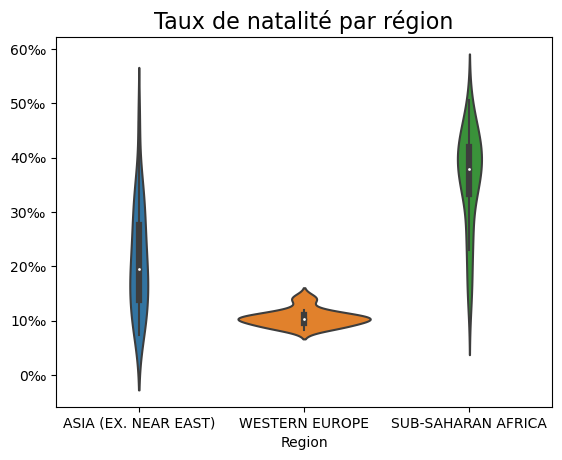

In [84]:
# Créer le graphique en violon
ax = sns.violinplot(x=df["Region"], y=df["Birthrate"])

# Ajouter un titre
plt.title('Taux de natalité par région', fontsize = 16)

# Renommer l'axe des ordonnées
plt.ylabel('')

# Transformer la légende des ordonnées en pour 1000
yticks = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}‰'.format(y) for y in yticks])

# Afficher le graphique
plt.show()